In [1]:
%%bash
echo 'sRNA,Total_annotations,PID_change' > turnover_vs_inheritance.csv
for x in {2..281}; do
    name=$( head -n 1 ../heatmap/identity/Salmonella.genus.identity | cut -d',' -f$x )
    echo -n ${name},
    cut -d',' -f$x ../heatmap/identity/*.genus.identity |\
    grep -v ${name} |\
    awk 'BEGIN{ a=100 } $1~/^[0-9]+$/ {sum+=1; if ($a > $1) ; a = $1 } END{print sum","(100-a)}'
done >> turnover_vs_inheritance.csv

In [1]:
#%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pal = {"Vertical":"#f8481c","Horizontal":"#fec615","Divergence":"#04d8b2","Unsure":"#53fca1"}
turnover = pd.read_csv("turnover_vs_inheritance.csv")
inheritance= pd.read_csv("inheritance.csv")

inheritance.columns=['sRNA','Inheritance type']

df = pd.merge(turnover,inheritance,on='sRNA')

plot = sns.scatterplot(x='PID_change',y='Total_annotations',hue='Inheritance type',data=df,palette=pal,legend='brief')
plot.set_title("Sequence divergence vs conservation for inheritance types")
plot.set(xlabel='Max change in PID for all annotations', ylabel='Total annotations')
#plt.setp(plot.get_legend().get_texts(), fontsize='1')
#plot.fig.get_axes(left=True)
#plt.legend(loc='upper left')
#box = plot.get_position()
#plot.set_position([box.x0, box.y0, box.width * 0.85, box.height])
plt.legend(fontsize=7)
plt.figure(figsize=(5,5))
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 500x500 with 0 Axes>

/home/beth/inst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  


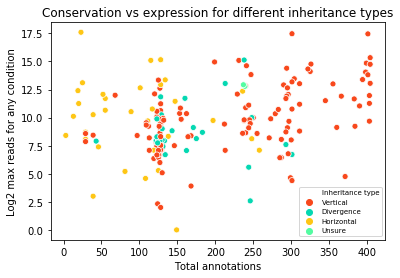

<Figure size 360x360 with 0 Axes>

In [2]:
import numpy as np

pal = {"Vertical":"#f8481c","Horizontal":"#fec615","Divergence":"#04d8b2","Unsure":"#53fca1"}
exp = pd.read_csv("../expression/salcom1/hinton_relative_expression.csv", header=None)
exp['max'] = exp.max(axis=1)
exp['max'] = np.log2(exp['max'])

exp.rename(columns = {list(exp)[0]: 'sRNA'}, inplace = True)
df2 = pd.merge(exp,df,on='sRNA')
df2.head()
plot=sns.scatterplot(y='max',x='Total_annotations',hue='Inheritance type',data=df2,palette=pal)
#plot.set_xlim(auto=True)
#plot.set(xscale='log')
plot.set_title("Conservation vs expression for different inheritance types")
plot.set(xlabel='Total annotations', ylabel='Log2 max reads for any condition')
plt.legend(fontsize=7)
plt.figure(figsize=(5,5))
plt.show()




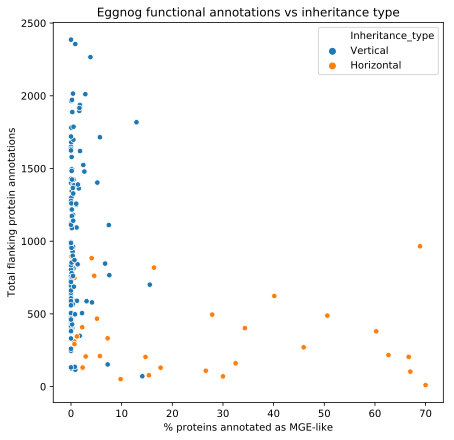

<Figure size 432x288 with 0 Axes>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#config InlineBackend.figure_formats = ['svg']

df = pd.read_csv("eggnog_ratios_vertical_vs_horizontal_only.csv",sep=",")
df.head()
plt.figure(figsize=(7,7))
plot=sns.scatterplot(x='percentage',y='Total_annotations',hue='Inheritance_type',data=df,s=30)
plot.set_title("Eggnog functional annotations vs inheritance type")
plot.set(xlabel='% proteins annotated as MGE-like', ylabel='Total flanking protein annotations')
plt.show()
plt.savefig("eggnog.svg", format="svg")

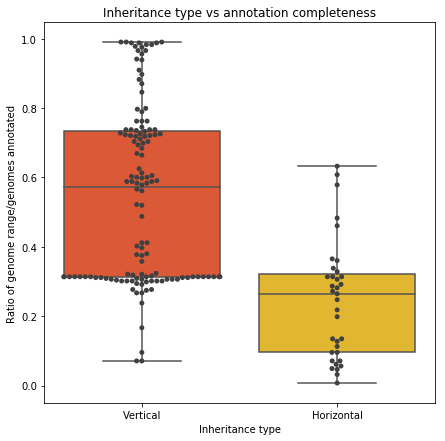

In [14]:
df = pd.read_csv("../heatmap/all.csv")
inheritance= pd.read_csv("inheritance_SMBE.csv",sep=",")
inheritance.columns=['sRNA','Inheritance type']
df = pd.merge(df,inheritance,on='sRNA')
df['Ratio'] = df['Total_annotations']/(df['Total_annotations']+df['Missing_in'])
plt.figure(figsize=(7,7))
plot = sns.boxplot(x='Inheritance type',y='Ratio',data=df,palette=pal)
plot = sns.swarmplot(x='Inheritance type',y='Ratio',data=df,color='.25')
plot.set_title("Inheritance type vs annotation completeness")
plot.set(ylabel='Ratio of genome range/genomes annotated')

plt.show()
df.to_csv(path_or_buf="ratio.csv")
#plt.savefig("boxplot.svg", format="svg")